# SLU09 - Classification with Logistic Regression: Learning notebook

In this notebook, we will cover the following: 

- Introduction to Classification
- Classification with Logistic Regression
- Using Logistic Regression

Some quick imports to get us started:

In [1]:
import warnings
warnings.filterwarnings(action="ignore")

import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt 
from sklearn.linear_model import LinearRegression, LogisticRegression
# The following is to make some plots along the way 


# Some quick utils to avoid filling this notebook with support code 
from utils import (get_data_iris, 
                   bar_plot_output,
                   plot_line,
                   plot_line_and_annot,
                   get_sepal_vs_petal_width,
                   final_classification_plot, 
                   gradient_descent_classification_plot, 
                   plot_maximum_log_likelihood,
                   multivariate_plot,
                   binary_plotter,
                   univariate_classifier,
                   univariate_classifier_logit,
                   predict_probability_point
                  )

In [2]:
# Let's just load some data that we will 
# use throughout this notebook

df = get_sepal_vs_petal_width()
X, y = get_data_iris()
X_full, y_full = X.copy(), y.copy()

## Welcome!

So, you just learned about Regression. Now it's time to tackle a different problem, Classification! You could be asking yourself the following.
> _What is classification and why do I need it?_

Classification is the problem of assigning one of a finite set of classes. We can understand classification as the answer to a simple question: 
> _Does the example belong to a specific class or not?_

Some simple straightforward examples of this area: 
- Is it going to rain tomorrow (yes/no)? 
- Is a customer going to spend more than last month (yes/no)?
- Is a certain picture a picture of a cat (yes/no)? 

You can see the pattern. What is the business or research need for doing this? Well, by being able to accurately classify a data point without knowing its class and we can take specific actions towards it. These actions mostly aim to optimize a certain aspect or to influence some aspects and behavior in the future. 

For instance, an insurance company would like to predict whether a client will churn (sorry for the jargon, churn means abandoning its services). If a client is classified as prone to churn, then the company could offer that same client some exclusive discounts or services. Thus, minimizing the client's odds of actually churning.

And the coolest thing... we are not stuck into a yes/no (binary) case! We can have multiclass problems - such as a case where you have a website to upload pictures and want to separate in the picture dogs from cats and from birds - you could build a classification algorithm that would learn the probability of the picture being a cat or being a dog or being a bird. We'll see later how this unfolds! 

<br> 

And yes... your algorithm would certainly get confused by this:

<img src="https://qph.fs.quoracdn.net/main-qimg-8b96ea4377047d8a9c2baf20ee41f086.webp" style="width: 400px;"/>

## Classification Tasks

So, one thing is key here - the number of classes! Depending on the number of existing classes to classify, the problem can be one of two:
- **Binary Classification**: A classification task with two possible classes. *Eg*: Churn prediction (Customer churns / customer do not churn)
- **Multiclass Classification**: A classification task with more than two possible classes. *Eg*: Animal classification (Cat / Dog / Bird / ...)

# A Quick Introduction - Initiation to Botany

A whole world awaits when you discover classification. There are hugely complex algorithms that can learn really hardcore functions (at expense of some overfitting - you will learn this in the next SLU!) to find a solution for this problem but the concepts behind Classification are relatively simple and performing accurate and generalizable (that are able to predict unseen data with quality) classification models can get quite complex. There are a lot of different algorithms and approaches for this task, but in this learning unit we will look at the simpler (but still useful!) approaches, and introduce some cool new concepts along the way.
<br>
<br>
<br>
**Story time!**

In this learning notebook, you will find yourself in the skin of a young up-and-comer botanist - fresh out of college - and you have been assigned a task by your boss to find an efficient and quick way to separate species of flowers based on some characteristics of the flower. With your statistics class still fresh in your mind you know you've got the tools for the job!


The dataset we will use is the tiny and famous Iris database:

<img src="https://kasperfred.com/media/posts/creating-your-first-machine-learning-classification-model-in-sklearn/cover2_Zz8UOwj.jpg" style="width: 400px;"/>

The first thing we do? **Look at how many examples we have of each class!**

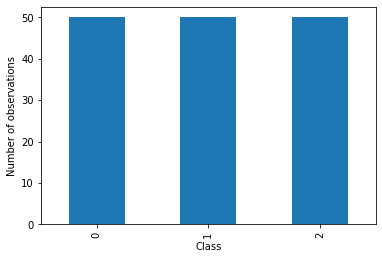

In [3]:
bar_plot_output(y)

Interesting.. we have about 50 examples of each type of Iris. Oh and about the classes:

> _0 is for iris type Setosa_
<br>
> _1 is for iris type Versicolour_
<br>
> _2 is for iris type Virginica_


First things first - **We will start by separating Setosas from the rest.** So Setosa will be labeled as 1 and Versicolours and Virginicas will be labeled with 0's.
<br>
Now, this is where your botanist skills come in handy - you know that what separates Setosas from the rest is the Petal Width! 


And you want to confirm this by **plotting our target variable vs. petal width:** 

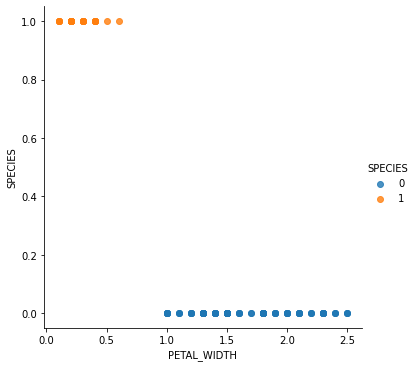

In [4]:
binary_plotter(X,y)

You are extremely excited! This seems a good linear separation so you think: **"I WILL APPLY MY LINEAR REGRESSION POWER! I will be able to predict the Setosa class based on the petal width with certainty!**

So, you developed your linear regression - recall that the equation we would want would be:

$$ \hat{y} = \beta_0 + \beta_1 * PetalWidth $$

After chunking the numbers (review linear regression notebook if you need/want to) you get the following coefficients:

$$ \hat{y} = 2.61 + (-3.98) * PetalWidth $$

**So, what is the predicted value for a flower with a petal width of 0.5 cm?**

![DrumRoll](https://media2.giphy.com/media/116seTvbXx07F6/giphy.gif "drumroll")



0.62! 

...

0.62? Of what? 

**Probability?**

.. Yeah, it can be. So an Iris with 0.5 cm of petal width has a 62% of probability of being a Setosa. You go home - get on the bus and suddenly start to scribble on your notebook.

**"Dear diary, what about an Iris with a petal width of 1.5 cm?"**

Sweating, you do the calculations:

$$ -3.36 = 2.61 + (-3.98) * 1.5 $$

**What?!!!?** So... an Iris with 1.5 cms of petal width has -336% probability of being a setosa? An echoe from your statistics class comes to your mind:

***probability must range from 0 to 1 (or 0 to 100%)!***

Next day you reach the lab and plot your beautiful but unusable regression, only to confirm your worst fear - you've got to use another model!


**Warning: Funny looking graph below, viewer discretion is advised:**

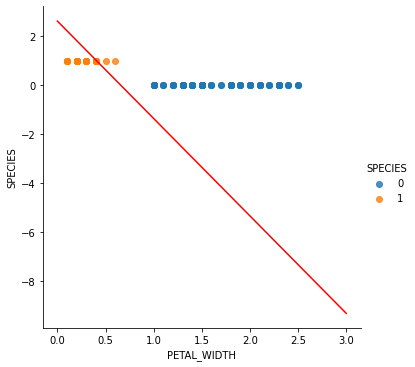

In [5]:
univariate_classifier(X,y)

**Ugh!**

![myeyes](https://media1.giphy.com/media/TEdBirpbIVMRpfqON1/giphy.gif "myeyes")


# The Logistic Regression

**Here is the holy grail of logistic regression:**

$$ y = \frac{1}{1 + e^{-z}} $$

**Let me explain!**

Despite its name, the [Logistic Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) is a classification algorithm. 

The idea is very simple: you have a linear model, and then apply a logit or sigmoid function (that beautiful function over there). 

Visually, this is the difference between logistic regression and linear regression:

<img src="https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1534281070/linear_vs_logistic_regression_edxw03.png" style="width: 400px;"/>

"*huuum... this really seems our example from above but with y = 1 on the right side...*"

Recall our formula from above: 

$$ \hat{y} = \beta_0 + \beta_1 * PetalWidth $$

And with logistic regression, we have the following: 

$$ y = \frac{1}{1 + e^{-(\beta_0 + \beta_1 * PetalWidth )}} $$

Which is called the sigmoid or logit function. This may look intimidating, but it's actually quite simple. The "weird" looking bit is just the linear regression, right? 

$$ y = \frac{1}{1 + e^{-(Cool\ this\ is\ just\ the\ linear\ regression!)}} $$

The "weird" looking bit can be simply defined as $z$ and we end up with the formula I first presented you in this chapter (logistic regression):

$$ y = \frac{1}{1 + e^{-z}} $$

**Let's get our botanist shirt on again! Now that we have new knowledge let's use the same linear regression but this time we will plug it in our sigmoid:**

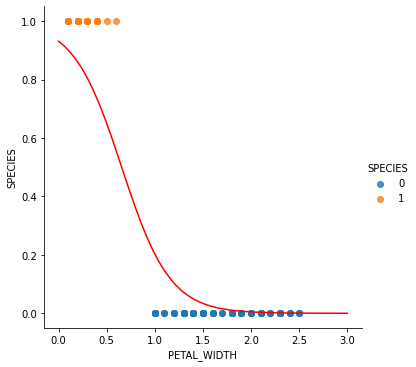

In [6]:
univariate_classifier_logit(X, y)

How cool is this? Now all the values in SPECIES (y-axis) are between 0 and 1 - **exactly the range of values we expect a probability to have! And look at the shape! Exactly how we humans think about probability!**

Imagine: 
- As soon as you move 1 centimeter in Petal Width you start to be even more confident that the Iris is not a Setosa (class=0).


- Imagine that this would be a step function - something that would be 1 until petal width = 1 and 0 from petal width = 1 onwards. Do you think this is how most real-world phenomena work? 


- Let me put it in a really bad metaphor to justify the shape of the curve: You know that family member at the family dinner that always has a strong opinion about everything? For him it's either 1 or 0, no in-between - that would be the behavior of a step function. Now, at family dinners - sometimes there is also that member that really knows that most of the world is probabilistic so he always ponders every factor of discussion and changes his opinion slowly and provided evidence - assigning larger confidence to his thinking given new information - that is the sigmoid function!

Oh, and the linear function we have calculated with the linear regression? That is the family member that changes his opinion really quickly! 

**Ok, enough of bad metaphors, let's get back to work!**

You are on the bus again on the way home (I don't know why we only do tests when we are on the bus, though.. I guess I am just bad at adding suspense) - You pick your notebook and do the same test you did the day before with your linear model - **what is the value resulting from our model for an Iris with a petal width of 1.5 cm?**

![Nervous](https://media1.giphy.com/media/lvzdeWk12qjmM/giphy.gif?cid=ecf05e47a2cb8ff691106c3200008669c6899f354a50e74d&rid=giphy.gif "nervous")




$$ y = \frac{1}{1 + e^{-(2.61 + (-3.98) * 1.5 )}} $$

**Equals:**

> _0.0335692 or 3.35%!_

**Hooray! So bare with me, a plant with a 1.5 cm petal width has a 3.35% probability of being a Setosa!**

And by looking at our plot, that makes total sense. Plants with larger petal widths are less probable of being setosas.
<br>
Go and present this to your boss - and collect that tap in the back as you've just dodged a statistical blunder.


![Phew](https://media1.giphy.com/media/3o7ZeCi0yTgb9AqXFm/giphy.gif "phew")





Now... I know what you're thinking...

<img src="https://i.imgflip.com/45ow2l.jpg" style="width: 400px;"/>


Yes, you're right! But that is because the 1's class is inversely related to the target variable. If the Setosas had the characteristic of having larger petal widths the sigmoid would be similar to the plot where we compared linear vs. sigmoid function!

And...

<img src="https://i.imgflip.com/45owap.jpg" style="width: 400px;"/>



Again you are totally right (not in the part of me trying to trick you, sure!) but remember - this is a simple toy example and most classification problems aren't this simple and **do not rely on a single variable.**

Hence our need to introduce the...

# Multivariate Logistic Regression

Wait, let me do this in a gif:

![Strongbob](https://media3.giphy.com/media/D7z8JfNANqahW/giphy.gif "Strongbob")


Congratulations, your boss was really impressed by your model. But he still has a problem.. you managed to separate Setosas from the rest - but now he wants to separate Versicolors from Virginicas.

You know that petal and sepal width might help you - so you plot both variables to understand the relationship with the target:

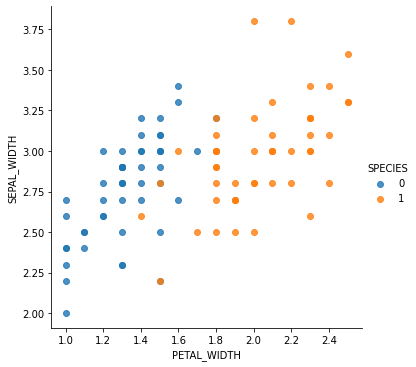

In [7]:
multivariate_plot(X, y)

So now we have new classes: 1's are virginicas and 0's are versicolors - we can probably use these variables to divide the classes and we can use the Logistic regression!


But... you are a curious person - you really want to know what happens when you apply a Linear regression to a multivariate classification problem, committing the same "error" you've made in the univariate part.

In linear regression terms, we are saying and expecting that the relationship between being a virginica or a versicolor is:  

$$ y = \beta_0 + \beta_1 * PetalWidth + \beta_2 * SepalWidth  $$

Let's try to find a line that separates the two classes, using a simple linear regression. 

In [8]:
df = get_sepal_vs_petal_width()

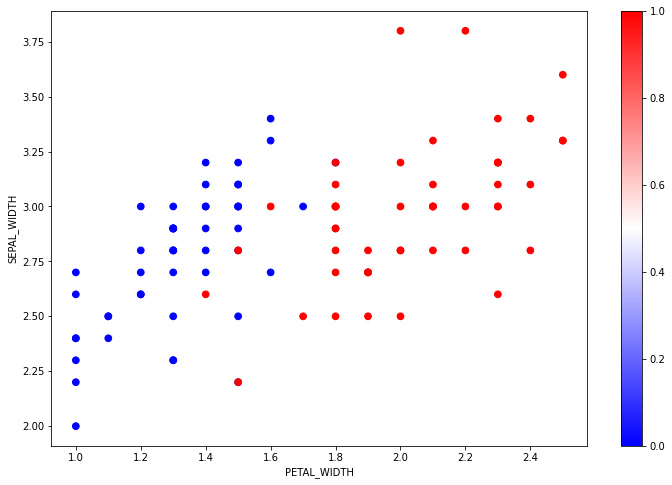

In [9]:
df.plot(kind='scatter', x='PETAL_WIDTH', 
        y='SEPAL_WIDTH', c=df['SPECIES'], 
        cmap='bwr', s=45, figsize=(12, 8), sharex=False, )
plt.show()

These are the true targets, either 0 or 1! - This graph is exactly the same as above but we have a scale. 

As we've said, looks like there is a vertical line that will do a decent job. 

Let's try that: 

In [10]:
# linear regression - From previous notebook
linear_reg = LinearRegression()

# fit (yay scikit - your best friend from now on - it's just so easy!) 
features = ['PETAL_WIDTH', 'SEPAL_WIDTH']
target = 'SPECIES'
linear_reg.fit(df[features], df[target])

LinearRegression()

And it's fitted. So what are our parameters for the linear regression? 

In [11]:
print('y = (%0.2f) x PETAL_WIDTH + (%0.2f) x SEPAL_LENGTH + (%0.2f)' % (linear_reg.coef_[0], 
                                                                 linear_reg.coef_[1], 
                                                                 linear_reg.intercept_))

y = (1.14) x PETAL_WIDTH + (-0.36) x SEPAL_LENGTH + (-0.38)


**Note: This is similar to what we have done above but with one more variable! - This time I am actually showing you how to get the coefficients from a Linear Regression with sklearn.**

In [12]:
df['predictions_linreg'] = linear_reg.predict(df[features])

**Let's take a look at the predicted probabilities graphically and a possible decision boundary:**

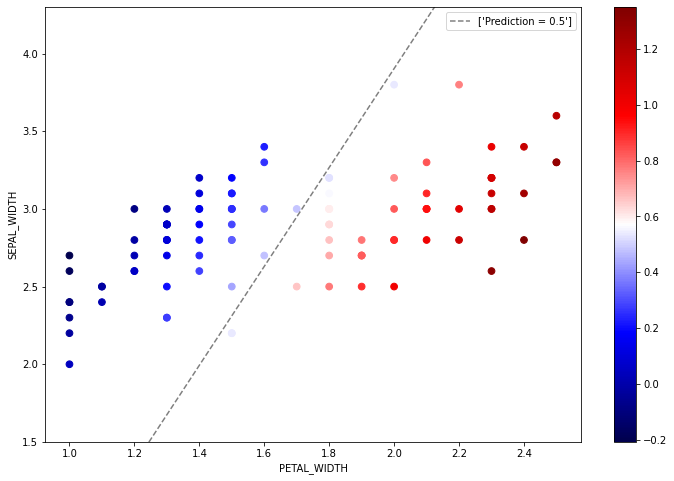

In [13]:
plot_line(df, x='PETAL_WIDTH', y='SEPAL_WIDTH', c=df['predictions_linreg'], linear_reg=linear_reg)

It looks as if we could (kind of) use this for classification. There are, however, a number of problems with this: 


- If we try to use the colors to indicate probability, they are way too conservative. Some of those reds are clearly red, yet they get given numbers such as 0.6, or 0.7.

- Also, we don't like the fact that it is predicting "1.2", what is that? Impossible probability, like in the univariate regression!

### What we would like 

What we would like would be for it to be "50-50" on the border, and then to start gaining confidence as the margin increases, similar to what we have done in the univariate example. In other words, we'd like it to return _"the probability of being 1."_

Something like... this: 

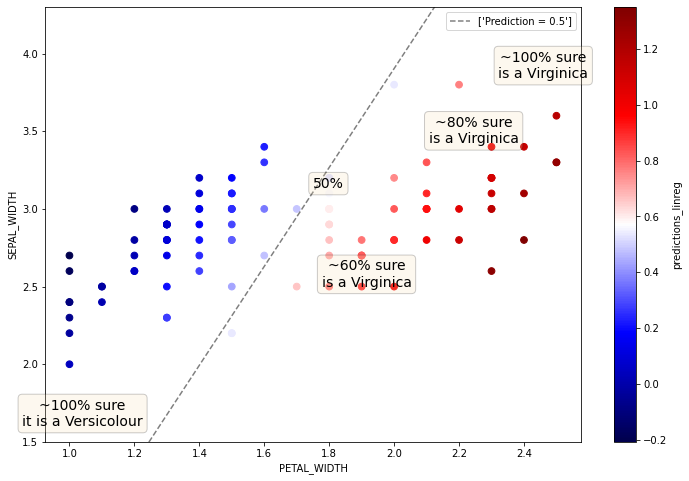

In [14]:
plot_line_and_annot(df, linear_reg)

**Yeah... you know this one.**

<img src="https://i.imgflip.com/45vmp0.jpg" style="width: 400px;"/>


Remembering:

$$ y = \frac{1}{1 + e^{-z}} $$

Let me do a small break to also explain the following:

> _How does Logistic Regression use this linear boundary to quantify the probability of a data point belonging to a certain class?_

## Probability Estimation - A deeper Dive

<img src="https://smallbizclub.com/wp-content/uploads/2019/01/Business-Warning-Signs.jpg" style="width: 150px;"/>


**Warning: The following chapter will contain some formulas and contains some advanced math concepts - Don't feel overwhelmed as, with more practice and study, you will get the hang of them - this is, probably, your first introduction to these types of concepts!** 

Ok, so let $x_1$ and $x_2$ be two variables, such as $SEPAL\_WIDTH$ and $PETAL\_WIDTH$ as we've been using until now. Also, let $\hat{p}$ be the probability of an event or class. It should be noted again that Logistic Regression can only classify between two classes at a time, a positive class $+$ and negative class $-$. For example, the $-$ and $+$ classes could represent species 0 or 1, respectively. The resulting function is as follows:

$$ln\left ( \frac{\hat{p}}{1-\hat{p}} \right ) = \beta_0 + \beta_1 x_1 + \beta_2 x_2$$

Consider a point $(a, b)$. Inputting the values of $x_1$ and $x_2$ into the boundary function, we will get its output $\beta_0 + \beta_1 a + \beta_2 b$. Now depending on the location of $(a, b)$, there are three possibilities to consider:

* $(a, b)$ lies in the region defined by points of the $+$ class. As a result, $\beta_0 + \beta_1 a + \beta_2 b$ will be positive, lying somewhere in $(0, \infty)$. Mathematically, the higher the magnitude of this value, the greater is the distance between the point and the boundary. Intuitively speaking, the greater is the probability that $(a, b)$ belongs to the $+$ class. Therefore, $\hat{p}$ will lie in $(0.5, 1]$. Let's try this out for a classification task with Logistic Regression between species 0 and 1 with variables $SEPAL\_WIDTH$ and $PETAL\_WIDTH$. By observation, we'll choose the point $(3,2)$, but you can change it to another one!

In [15]:
predict_probability_point(X_full, y_full, (3,2))

The probability of point (3.0,2.0) belonging to Species 1 is 0.81


* $(a, b)$ lies in the region defined by points of the $-$ class. Now, $\beta_0 + \beta_1 a + \beta_2 b$ will be negative, lying in $(-\infty, 0)$. But like in the positive case, the higher the absolute value of the function output, the greater the probability that $(a, b)$ belongs to the $-$ class. $\hat{p}$ will now lie in $[0, 0.5)$. Let's choose such a point for the same classification task as before! By observation, we'll choose point $(3,1)$, but you can change it to another one!

In [16]:
predict_probability_point(X_full, y_full, (3,1))

The probability of point (3.0,1.0) belonging to Species 1 is 0.05


* $(a, b)$ lies ON the decision boundary. In this case, $\beta_0 + \beta_1 a + \beta_2 b = 0$. This means that our model cannot really say whether $(a, b)$ belongs to the $+$ or $-$ class. As a result, $\hat{p}$ will be exactly $0.5$. Such a point would be $(3,1.69)$.

In [17]:
predict_probability_point(X_full, y_full, (3, 1.69))

The probability of point (3.0,1.7) belonging to Species 1 is 0.53


<img src="https://i.imgflip.com/286p5c.jpg" style="width: 400px;"/>

On the other side, the $\frac{\hat{p}}{1-\hat{p}}$ function is called the $odds \ ratio$ function $OR(X)$, which is essentially the ratio of the probability of an observation belonging to a certain class vs. it not belonging. Probability and odds convey the exact same information, but as $\hat{p}$ ranges $[0, 1]$, $OR(X)$ ranges $(0, \infty)$.

That was enough theory. Imagine that we want to classify iris flowers between species 0 and 1 by only using $SEPAL\_WIDTH$ and $PETAL\_WIDTH$ as $x_1$ and $x_2$, respectively. Suppose we already have a logistic regression model trained which coefficients are:

$$\beta_0 = -1.53188604 \\ \beta_1 = -1.69313124 \\ \beta_2 = 3.90054782$$ 

If we want to obtain the probability $\hat{p}$ of a sample $(3,1)$ belonging to class $+$ we do the following.  

* Let us compute this boundary function $\beta_0 + \beta_1 a + \beta_2 b$ which output we will simply call $z$;

In [18]:
z = -1.53188604 + -1.69313124 * 3 + 3.90054782 * 2
print(z)

1.1898158799999994


* Compute the $odds \ ratio$, through $OR(X) = e^z$;

In [19]:
OR = np.exp(z)
print(OR)

3.2864760457041067


* Compute $\hat{p}$ = $\frac{e^z}{1 + e^z} = \frac{1}{1 + e^{-z}}$, our good old $logistic \ function$.

In [20]:
p = OR / (1 + OR)
print(p)

0.7667081328957391


Let's check if the result from the function above is exactly the same as the sigmoid function:

In [21]:
1/(1+np.exp(-z))

0.7667081328957392

**TA-DA! This chapter has shown us how we intertwine between the probability function using the odds ratio and the sigmoid function - and how Logistic Regression is less confident of assigning the example to a class when the example is near the decision boundary.**

## Delving deeper into Classification

Now we know how Logistic Regression estimates class probabilities $\hat{p}$, but how do we define if an iris plant is  a versicolor or a virginica? 

For this binary classification task, we can simply say that if for a given iris plant $\hat{p} >= threshold$ then it belongs to the virginica class (remember that virginica is 1 on your data) else it belongs to the versicolor class. By default, binary classification algorithms use $threshold=0.5$.

However, $threshold$ can be modified to have values between $[0, 1]$. This can be useful in cases where one of the classes has many fewer data samples compared to the other. Such problems are said to have a class imbalance, which is not the case for this problem.

Let's try to classify species 0 and 1 using several different $threshold$ values and see what happens. We are going to check three thresholds: 

> _Classify as 1 everything above 0.25 - a more relaxed decision boundary_
<br>
> _Classify as 1 everything above 0.50 - the default decision boundary_
<br>
> _Classify as 1 everything above 0.75 - a stricter decision boundary_

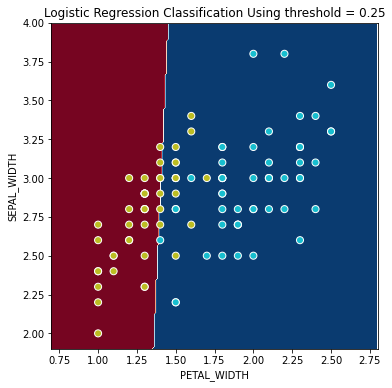

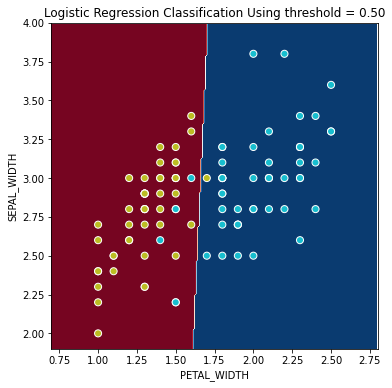

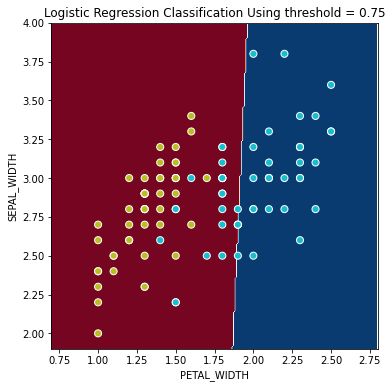

In [22]:
final_classification_plot(X_full, y_full, threshold_values=[0.25, 0.5, 0.75])

Notice how the results vary by modifying the threshold and that the results are the best when $threshold=0.5$ for this particular case - you can think of decision boundaries as one of the main ways that you can connect algorithms with business decisions. In some cases, the cost of misclassifying 1's is lower (for example, sending a marketing e-mail to a customer), in other cases, the cost of classifying some examples as 1 may be harmful to the business (for example, in a bank,  classifying a customer as a high-risk customer when he does not show that behavior).

Back to botany lab! You decide that your Logistic Regression is quite good - so you deliver the solution above at threshold = 0.5. Everything on the blue region is classified as a virginica and everything on the red region is a versicolour! 

With this solution you just misclassified 5 iris - given that we have 100 examples this is an excellent classification error - you will learn more about errors and metrics up ahead! 

Well done, young botanist! You delivered your algorithm and your boss is pretty pleased with you. You also received a special apron with your name that you can use in the lab.

**But... something is missing - your line is more vertical than diagonal... why is this so? This was the line that minimized the number of misclassified Iris, it seems... but why??** You are on the bus going home (by this time you should not be surprised by the bus reference) and you start to think: 

> _How do I exactly find the optimal parameters beta and the optimal frontier? Is it by trial and error?_

You look out the window - and see an ad about hiking:

![ConanHiking](https://media0.giphy.com/media/QM8d5Zx9G5gLhDNJYc/giphy.gif "ConanHiking")


***And suddenly you remember...***

**GRADIENT DESCENT!**

<img src="https://i.imgflip.com/460eai.jpg" style="width: 400px;"/>


## Starting with Cost Function

Time for a metaphor! (yes, another one!) So, in machine learning, the focus is on learning from data, right? And how can a model learn from data like an individual can learn a new skill? Through minimizing a cost function / error rate! An aspiring new musician would like to minimize the number of times he plays out of tune, which would be his cost function. He will learn how to play the instrument correctly through trial and error as well as feedback, thus minimizing his cost function. 

A machine learning model does just the same, it aims to minimize a cost function which is a measure of how wrong it is in terms of its ability to estimate the relationship between $X$ and $Y$. Therefore, the aim of a machine learning model is to find the coefficients, parameters, weights, or a structure that minimizes a cost function, which it will iteratively do. And here is a picture of some renaissance painters mocking our cost function: 

<img src="https://i.imgflip.com/288yvb.jpg" style="width: 400px;"/>

Keeping up with the music metaphor and to teach us about gradient descent we have Mr. Fletcher with us today:

<img src="https://i.pinimg.com/736x/ce/c1/3e/cec13ea306017b08226885156329284c.jpg" style="width: 200px;"/>


## Maximum Log-Likelihood

Unfortunately, we shouldn't use the same cost function Mean Squared Error as we did for linear regression. Why? Because our prediction function is non-linear (due to the logistic function). Squaring this prediction as we do in MSE results in a non-convex function with many local minima. If our cost function has many local minima, gradient descent may not find the optimal global minima! Let's see what Mr. Fletcher has to say:

<img src="https://i.imgflip.com/460euw.jpg" style="width: 400px;"/>

Instead of Mean Squared Error, we use a cost function called Maximum Likelihood, adapted to log-likelihood ($i.e.$ Maximum Log-Likelihood). For a dataset with $N$ observations, $y_N$ true labels and $\hat{p}_N$ predictions it is defined as follows:

$$H_{\hat{p}}(y) = - \frac{1}{N}\sum_{i=1}^{N} \left [{ y_i \ \log(\hat{p}_i) + (1-y_i) \ \log (1-\hat{p}_i)} \right ]$$

It's better to first observe its behavior. Let's plot two charts with the predicted probability $\hat{p}$ going from $0$ to $1$, but for two different real labels $y$. *When we correctly label a point, the contribution of that point to the cost function is approximately 0!*

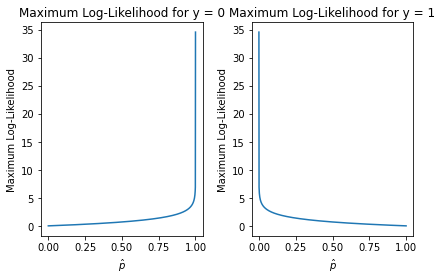

In [23]:
plot_maximum_log_likelihood()

Basically, the key thing to note is that the cost function penalizes confident and wrong predictions more than it rewards confident and right predictions! Now that we know the cost function that is mostly used for Logistic Regression let's now look at how a loss function can be minimized.

## Optimization: Gradient Descent

Now that you know the concept behind the cost function, you may be asking yourself how we can minimize it. That is where gradient descent comes in! It is one of the most efficient optimization algorithms which attempts to find a local or global minima of a function. 

Gradient descent allows a machine learning model to learn the gradient (*aka* the direction) that the model should take in order to reduce errors and thus minimizing the cost function. 

In a simplified way, gradient descent evaluates a point and finds the "direction" where the cost function goes down the most. In this example, gradient descent is a river going down a mountain. It will always go down the "steepest" possible route. 

![](https://ml-cheatsheet.readthedocs.io/en/latest/_images/gradient_descent.png)

In the Logistic Regression example, direction refers to how the model parameters $\beta_0$, $\beta_1$ and $\beta_2$ should be tweaked or corrected to reduce the cost function. As the model iterates, it tends to a minimum where any further changes to the parameters produce little or any changes in the cost function. In such a case, it is said that it converged. We have an example below where we can see gradient descent in action.

<img src="https://cdn-images-1.medium.com/max/1600/1*ZmzSnV6xluGa42wtU7KYVA.gif" style="width: 400px;"/>

An alternative to gradient descent would be brute-forcing a potentially infinite combination of parameters until the set of parameters that minimizes the cost is found. However, this is not feasible, would take too long and would need a lot of computing power and, thus, gradient descent enables the learning process to make corrective updates to the learned estimates that move the model towards an optimal combination of parameters.

How interesting would it be to actually observe Logistic Regression do gradient descent and change its decision boundary? Let's do just that! Let's observe 25 iterations of gradient descent for another example using the Iris dataset.

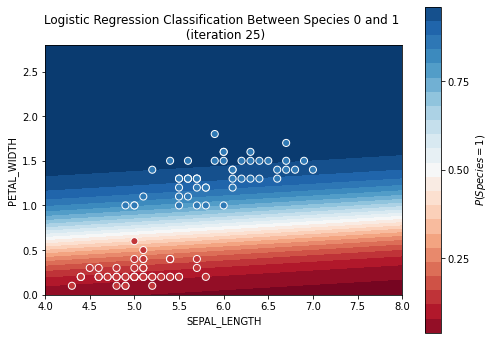

<Figure size 576x432 with 0 Axes>

In [24]:
# this cell takes a bit of time to run, but is pretty 
gradient_descent_classification_plot(X_full, y_full, 25)

Nice! Let's return to the musician metaphor. In the first iteration, our player is completely out of tune and our song sucks (consider the song the decision boundary) - he's playing random notes - those wrong notes are our *betas* - as he starts he has a teacher like Mr. Fletcher **(jeez, oh dear..)**:

<img src="https://i.imgflip.com/461nws.jpg" style="width: 400px;"/>


So gradient descent *(you)* starts to correct the betas *(the notes)* so that the cost function *(the difference between your song and the real song)* is lower based on Mr. Fletcher *(that tells you the difference between what you predicted and the real values)*. So you start to adjust the decision boundary to a more correct one by finding the optimal betas *(the notes)* that minimize the cost function. At the end of gradient descent, you should (sometimes you are not) be at a global minima of the cost function.

<img src="https://i.imgflip.com/461odr.jpg" style="width: 400px;"/>


We can see that the decision boundary starts quite wide and somewhat horizontal and then starts to shrink and move between the two different iris species - this is equivalent to playing a more pleasant song!

Now you should be asking yourself how can you apply gradient descent to modify the model's parameters and minimize the cost function. For that, let's refresh our memory on how we can predict a probability only with an intercept $\beta_0$ and coefficient $\beta_1$. 

$$ \hat{p} = \frac{e^{\beta_0 + \beta_1 x_1}}{1 + e^{\beta_0 + \beta_1 x_1}}$$

This can be further simplified into

$$ \hat{p} = \frac{1.0}{1.0 + e^{(-(\beta_0 + \beta_1 x_1))}}$$

But wait! We still don't know what Gradient Descent really means! Basically, is it the process of minimizing a function by following the gradients of the cost function. This involves knowing the form of the cost as well as the derivative so that from a given point you know the gradient and can move in that direction, e.g. downhill towards the minimum value, approaching the song you want to play.

### Stochastic Gradient Descent

In machine learning, we can use a technique that evaluates and updates the coefficients every iteration called stochastic gradient descent to minimize the error of a model on our training data. The way this optimization algorithm works is that each training instance is shown to the model one at a time. The model makes a prediction for a training instance, the error is calculated and the model is updated in order to reduce the error for the next prediction. This procedure can be used to find the set of coefficients in a model that result in the smallest error for the model on the training data. Each iteration, the coefficients ($\beta$) in machine learning language are updated using the equation:

$$\beta_{t+1} = \beta_t - learning\_rate \frac{\partial H_{\hat{p}}(y)}{\partial \beta_t}$$

which we can simplify to

$$\beta_{t+1} = \beta_t + learning\_rate \left [(y - \hat{p}) \ \hat{p} \ (1 - \hat{p}) \ x \right]$$

where $learning\_rate$ is a learning rate that you must configure (*e.g*. 0.1). You think of the learning rate as to how big a step you want to take in each iteration. Small steps converge slower, while big steps are faster but might not converge. 

Exceptionally, the intercept is updated without an observation as it is not associated with a specific observation.

$$\beta_{0(t+1)} = \beta_{0(t)} - learning\_rate \frac{\partial H_{\hat{p}}(y)}{\partial \beta_{0(t)}}$$

which we can also simplify to

$$\beta_{0(t+1)} = \beta_{0(t)} + learning\_rate \left [(y - \hat{p}) \ \hat{p} \ (1 - \hat{p})\right]$$

We can see that each sample has a big impact on the convergence. What happens if the data is sorted by class or in this case species? In the beginning, the algorithm would only use data from Species 0 plants which could make it converge before even using data from other species! This is why we should always shuffle the data prior to performing Stochastic. Gradient Descent

### Batch Gradient Descent

Stochastic gradient descent can be very noisy which makes it difficult to converge properly to the global minima. This happens because the model parameters are updated with each individual sample. A simple approach that reduces the noise could be to average the gradient over all training samples. This approach exists and it is called **Batch Gradient Descent**. The downside of using Batch instead of Stochastic is that it is slower. We can update a specific coefficient ($\beta$) as follows:

$$\beta_{t+1} = \beta_t + learning\_rate \frac{1}{N} \sum_{i=1}^{N} \left [(y_i - \hat{p}_i) \ \hat{p}_i \ (1 - \hat{p}_i) \ x_i \right]$$

And the intercept:

$$\beta_{0(t+1)} = \beta_{0(t)} + learning\_rate \frac{1}{N} \sum_{i=1}^{N} \left [(y_i - \hat{p}_i) \ \hat{p}_i \ (1 - \hat{p}_i) \right]$$

It should be noted that the formulas were already simplified to leave most of the math out. If you run this iterative process many times, you should obtain the coefficients that converge to a minimum of the cost function and thus, your logistic regression model!

## Normalization

Another thing (we are almost at the end, hold on!) - It is crucial that your variables are adjusted between $[0;1]$ (normalized) or standardized so that you can correctly analyze some logistic regression coefficients for your possible future employer. Additionally, it is also important to normalize your data if your algorithm is doing gradient descent which will lead to a much faster convergence. 

To adjust your variables between $[0;1]$, you would apply the following formula:

$$ x_{normalized} = \frac{x - x_{min}}{x_{max} - x_{min}}$$

which is called normalization. It is a simple formula, but Scikit-Learn has this transformation already implemented called `MinMaxScaler`. To do so, you would do the following:

In [25]:
from sklearn.preprocessing import MinMaxScaler

sclr = MinMaxScaler().fit(X_full)
normalized_X = sclr.transform(X_full)

And from then, you could confidently apply Logistic Regression to the normalized data and interpret the resulting model.

## [Sklearn Logistic Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

We now know most of what we need to know about Logistic Regression. If you understood everything until now then you should have an idea of its strengths and weaknesses:
* **Strengths:** 
    * Outputs have a probabilistic interpretation and can be updated easily with new data using stochastic or batch gradient descent. Additionally, the algorithm can be regularized to avoid overfitting - something you will learn further ahead. 
    * Explainable and interpretable in terms of business - you can easily extract the coefficients that are tightly related to the influence of variables in the outcome.


* **Weaknesses:** 
    * Logistic regression tends to underperform when there are multiple or non-linear decision boundaries. They are not flexible enough to naturally capture more complex relationships.

Fortunately, there are already a lot of logistic regression implementations that are quite computationally efficient. So, there's no need for you to code them from scratch. You can find one of those implementations in sklearn!

<img src="https://i.imgflip.com/461p7g.jpg" style="width: 400px;"/>


**Let's use it!**

In [26]:
from sklearn.linear_model import LogisticRegression

This implementation can use these optimization methods:
* liblinear: default;
* newton-cg;
* lbfgs; 
* sag;
* saga.

Now that you've loaded the algorithm, you need to first create the classifier object. We will set `random_state` to $0$ just to make sure we obtain the exact same results. 

In [27]:
logit_clf = LogisticRegression(random_state=0)

Cool, now you just created the algorithm object that is ready to learn from some juicy data. Now you have to give it the input data $X$ (normalized version) as well as the corresponding labels $y$ so that it can train and converge to the optimal parameters.

In [28]:
logit_clf.fit(normalized_X[:100,:], y_full[:100])

LogisticRegression(random_state=0)

And voilà! You just created your first logistic regression model. Now, it would be interesting to know how good the model is! And we can do so, by checking the percentage of correctly predicted observations on the data by doing the following.

In [29]:
logit_clf.score(normalized_X, y_full)

0.6666666666666666

Oh, we were right 66% of the time! What if we want to get the predictions for each sample instead of the score?

In [30]:
preds = logit_clf.predict(normalized_X)
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Great! These are the `argmax` of the predicted probabilities, in other words, the class with the highest predicted probability for each sample. However, it would be more interesting to obtain and observe the probabilities of each class! We can do it this way.

In [31]:
probas = logit_clf.predict_proba(normalized_X)
probas[:10]

array([[0.87421135, 0.12578865],
       [0.83443579, 0.16556421],
       [0.87158416, 0.12841584],
       [0.85450194, 0.14549806],
       [0.88707426, 0.11292574],
       [0.84983456, 0.15016544],
       [0.87464055, 0.12535945],
       [0.86374154, 0.13625846],
       [0.85124623, 0.14875377],
       [0.85429766, 0.14570234]])

And then we can do whatever we want with the predicted probabilities!

You may now be legitimately asking... 

> _"Why didn't the classifier just return probability of being 1, instead of making me jump through hoops?"_

![](https://i.imgflip.com/2ntgpm.jpg)

## Multi-Class Classification with Logistic Regression

Let's say that instead of solving our problem by separating 2 types of flowers each time, we solved it by separating all 3 of them at the same time - just like in our original problem. 

Recall the SPECIES column has 3 types of Iris: 

In [32]:
df_full = pd.concat([X_full, y_full], axis=1)
display(df_full.sample(5, random_state=50))

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES
88,5.6,3.0,4.1,1.3,1
72,6.3,2.5,4.9,1.5,1
20,5.4,3.4,1.7,0.2,0
16,5.4,3.9,1.3,0.4,0
147,6.5,3.0,5.2,2.0,2


Now let's make some predictions with this dataset. Same logic as before. 

In [33]:
# instantiate
logit = LogisticRegression(multi_class='ovr')

# fit 
logit.fit(normalized_X, y_full)

# predict (optional)
predictions = logit.predict(normalized_X)

# predict probabilities (generally what we want)
probability_predictions = logit.predict_proba(normalized_X)

In [34]:
logit

LogisticRegression(multi_class='ovr')

In [35]:
# display the first 5 predicted probabilities 
probability_predictions[0:5]

array([[0.81655788, 0.17124246, 0.01219965],
       [0.73597832, 0.25334454, 0.01067713],
       [0.77705744, 0.21333229, 0.00961027],
       [0.7537163 , 0.2362369 , 0.01004681],
       [0.83192584, 0.15624898, 0.01182518]])

So how do we read this... The first flower can be class 0 or 1, but if very unlikely to be class 2 

In [36]:
probability_predictions[0]

array([0.81655788, 0.17124246, 0.01219965])

Let's look at another flower, the one at position 50: 

In [37]:
probability_predictions[50]

array([0.08508421, 0.38039221, 0.53452358])

Ok, so this flower: 
- is likely to be a Virginica (53% probability)
- may still be a Versicolor (38% probability) 
- is almost certainly not a Setosa (about 8% probability). 

The algorithm has a lot more arguments that you can change to modify its behavior as well as other methods that you can explore. Feel free to explore them here: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

You probably have some questions regarding multi-class classification right now - as this notebook got pretty big and you are probably digesting a lot of information, we prefer not to dig deeper into multi-class theory, for now. 

Take a look at this article to understand how it works: https://machinelearningmastery.com/one-vs-rest-and-one-vs-one-for-multi-class-classification/ - above we are using method One vs. Rest (ovr).
